In [292]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [293]:
# load in housing data with necessary zips
housing_data = pd.read_csv("Resources/Clean/San_Diego_Housing_Data.csv", index_col=0)
housing_data.reset_index(inplace=True)
housing_data

# # get necessary zip
# zipcodes_df = pd.DataFrame(housing_data['Zip Code'])
# zipcodes_df.rename(columns = {'Zip Code':'zipcode'}, inplace = True)
# zipcodes_df
# get necessary zip
zipcodes_df = pd.read_csv("Resources/Clean/San_Diego_Zip_Codes.csv")
zipcodes_df.rename(columns = {'zip_code':'zipcode', 'Class':'class'}, inplace = True)
zipcodes_df

# Create geo tables
schools = pd.read_csv("Resources/Clean/San_Diego_School_Data.csv")
businesses = pd.read_csv("Resources/Clean/San_Diego_Markets.csv")
transit = pd.read_csv("Resources/Clean/San_Diego_Transit.csv")
parks = pd.read_csv("Resources/Clean/San_Diego_Parks.csv")
hospitals = pd.read_csv("Resources/Clean/San_Diego_Hospital_Data.csv")

In [294]:
# hospitals Geos
hospital_geos = hospitals[['name','lat','lng','zipcode']]
hospital_geos['resource'] = 'hospital'
hospital_geos = hospital_geos.set_index('zipcode')
hospital_geos

,name,lat,lng,resource
zipcode,,,,
91911,Sharp Chula Vista Med Ctr,32.619391,-117.022284,hospital
91911,Bayview Hosp & Mental System,32.617520,-117.071364,hospital
91942,Sharp Grossmont Hospital,32.781653,-117.008397,hospital
91950,Paradise Valley Hospital,32.685113,-117.082885,hospital
92024,Scripps Mem Hospital-Encinitas,33.038342,-117.284453,hospital
92025,Palomar Medical Center,33.124859,-117.075823,hospital
92028,Fallbrook Hospital,33.380736,-117.244647,hospital
92037,Scripps Mem Hosp-La Jolla,32.885154,-117.225538,hospital
92037,Scripps Green Hospital,32.897036,-117.242773,hospital


In [311]:
# Schools Geos
schools = schools[schools['rating'] >= 7 ]
school_geos = schools[['name','lat','lng','zipcode']]
school_geos['resource'] = 'school'
school_geos = school_geos.set_index('zipcode')
school_geos

/var/folders/jg/35qqdf9j6v74xwfm65sq9zdh0000gn/T/ipykernel_18644/2630703708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_geos['resource'] = 'school'


,name,lat,lng,resource
zipcode,,,,
92037,Bird Rock Elementary School,32.811186,-117.263065,school
92093,Preuss School Ucsd,32.878454,-117.229467,school
92037,La Jolla Elementary School,32.839236,-117.271699,school
92037,Torrey Pines Elementary School,32.859286,-117.242970,school
92037,La Jolla High School,32.832408,-117.264719,school
...,...,...,...,...
92024,San Dieguito High Academy,33.037340,-117.274455,school
92024,Ocean Knoll Elementary School,33.039846,-117.277131,school
92024,Paul Ecke-Central Elementary School,33.057975,-117.298047,school


In [312]:
# Business Geos
business_geos = businesses[['name','lat','lng','zipcode']]
business_geos['resource'] = 'business'
business_geos = business_geos.set_index('zipcode')
business_geos

/var/folders/jg/35qqdf9j6v74xwfm65sq9zdh0000gn/T/ipykernel_18644/732278148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_geos['resource'] = 'business'


,name,lat,lng,resource
zipcode,,,,
91910,Smart & Final Extra!,32.639000,-117.050924,business
91910,Sprouts Farmers Market,32.627807,-117.074994,business
91911,Carnival Supermarket,32.621859,-117.072892,business
91910,Target Grocery,32.653616,-117.065593,business
91910,99 Ranch Market,32.629342,-117.040931,business
...,...,...,...,...
92154,El Picador Foods,32.573865,-117.055439,business
92173,Liva Distributor,32.568932,-117.064476,business
92173,La Bodega Market,32.552844,-117.042370,business


In [313]:
# Transit Geos

transit_geos = transit[['stop_name','lat','lng','Zip Code']]
transit_geos['resource'] = 'transit'
transit_geos.rename(columns = {'Zip Code':'zipcode'}, inplace = True)
transit_geos.rename(columns = {'stop_name':'name'}, inplace = True)
transit_geos = transit_geos.set_index('zipcode')
transit_geos

,name,lat,lng,resource
zipcode,,,,
91941,Allison Av & Palm Av,32.765915,-117.019588,transit
91941,La Mesa Bl & University Av,32.767805,-117.015427,transit
91977,Sweetwater Rd & Jamacha Rd,32.714228,-117.012800,transit
91941,La Mesa Bl & Glen St,32.769344,-117.011003,transit
91977,Orville St & Brucker Av,32.709168,-117.009255,transit
...,...,...,...,...
92008,Plaza Camino Real Transit Center,33.178276,-117.336525,transit
92057,San Luis Rey Transit Center,33.254410,-117.298129,transit
92075,Solana Beach Station,32.992937,-117.271067,transit


In [314]:
# Park Geos
park_geos = parks[['name','lat','lng','postcode']]
park_geos.rename(columns = {'postcode':'zipcode'}, inplace = True)
park_geos['resource'] = 'park'
park_geos = park_geos.set_index('zipcode')
park_geos

/var/folders/jg/35qqdf9j6v74xwfm65sq9zdh0000gn/T/ipykernel_18644/1421351039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_geos.rename(columns = {'postcode':'zipcode'}, inplace = True)
/var/folders/jg/35qqdf9j6v74xwfm65sq9zdh0000gn/T/ipykernel_18644/1421351039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_geos['resource'] = 'park'


,name,lat,lng,resource
zipcode,,,,
91901,Wright's Field,32.819494,-116.763489,park
91901,Viejas Park,32.842437,-116.704128,park
91901,Loveland Fishing Access,32.799750,-116.760434,park
91902,Sweetwater Summit Regional Park,32.682508,-117.002547,park
91902,Sweetwater County Park,32.682592,-117.001904,park
...,...,...,...,...
92763,Trestles Beach Trailhead,33.395758,-117.591568,park
92051,Rock Formation,33.402802,-117.551148,park
92763,San Onofre,33.389572,-117.593152,park


In [315]:
clean_geos_all = pd.concat([hospital_geos,school_geos, business_geos, transit_geos, park_geos])
clean_geos_all

,name,lat,lng,resource
zipcode,,,,
91911,Sharp Chula Vista Med Ctr,32.619391,-117.022284,hospital
91911,Bayview Hosp & Mental System,32.617520,-117.071364,hospital
91942,Sharp Grossmont Hospital,32.781653,-117.008397,hospital
91950,Paradise Valley Hospital,32.685113,-117.082885,hospital
92024,Scripps Mem Hospital-Encinitas,33.038342,-117.284453,hospital
...,...,...,...,...
92763,Trestles Beach Trailhead,33.395758,-117.591568,park
92051,Rock Formation,33.402802,-117.551148,park
92763,San Onofre,33.389572,-117.593152,park


In [316]:
coords_all = clean_geos_all[['lat', 'lng']].values
coords_all

array([[  32.6193909, -117.0222837],
       [  32.6175204, -117.0713635],
       [  32.7816526, -117.0083968],
       ...,
       [  33.3895721, -117.5931518],
       [  33.3960846, -117.5913646],
       [  33.3853075, -117.5939359]])

In [317]:
clean_geos_all.reset_index(inplace = True)
df = clean_geos_all[clean_geos_all.zipcode.isin(zipcodes_df.zipcode)]
df.set_index('zipcode', inplace=True)
df

,name,lat,lng,resource
zipcode,,,,
91911,Sharp Chula Vista Med Ctr,32.619391,-117.022284,hospital
91911,Bayview Hosp & Mental System,32.617520,-117.071364,hospital
91942,Sharp Grossmont Hospital,32.781653,-117.008397,hospital
91950,Paradise Valley Hospital,32.685113,-117.082885,hospital
92025,Palomar Medical Center,33.124859,-117.075823,hospital
...,...,...,...,...
92173,Howard Lane Neighborhood Park,32.566448,-117.063594,park
92154,Tijuana River Valley Sports Complex,32.558188,-117.075484,park
92154,Tijuana River County Open Space Preserve PARK ...,32.544846,-117.074652,park


In [318]:
coords = df[['lat', 'lng']].values
coords

array([[  32.6193909, -117.0222837],
       [  32.6175204, -117.0713635],
       [  32.7816526, -117.0083968],
       ...,
       [  32.5448463, -117.0746519],
       [  32.5540673, -117.0442848],
       [  32.5410592, -117.0926469]])

In [319]:
df.groupby(['resource']).count()

,name,lat,lng
resource,,,
business,282,282,282
hospital,14,14,14
park,675,675,675
school,122,122,122
transit,3728,3728,3728


In [320]:
# Clustering from prime zips
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=20, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters-1)])
print(f'Number of clusters: {num_clusters}')

Number of clusters: 22


In [321]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [322]:
lats, lngs = zip(*centermost_points)
points = pd.DataFrame({'lng':lngs, 'lat':lats})
points

,lng,lat
0,-117.203625,32.752779
1,-117.101698,32.677374
2,-117.134665,32.706320
3,-117.101315,32.738601
4,-117.081696,32.752794
5,-117.099297,32.700454
6,-117.120618,32.914650
7,-117.067105,32.569656
8,-117.181159,32.820958
9,-117.081729,32.640703


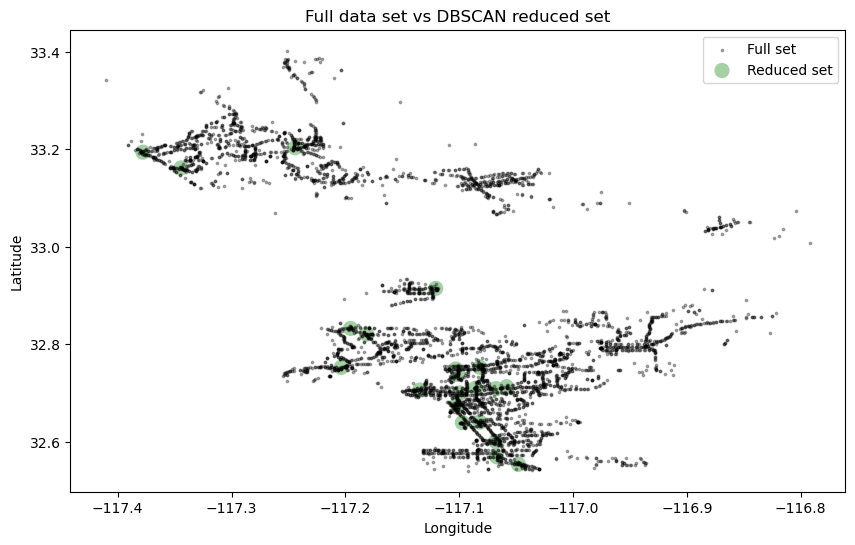

In [323]:
fig, ax = plt.subplots(figsize=[10, 6])
p_scatter = ax.scatter(points['lng'], points['lat'], c='#99cc99', edgecolor='None', alpha=0.9, s=120)
df_scatter = ax.scatter(df['lng'], df['lat'], c='k', alpha=0.3, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, p_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

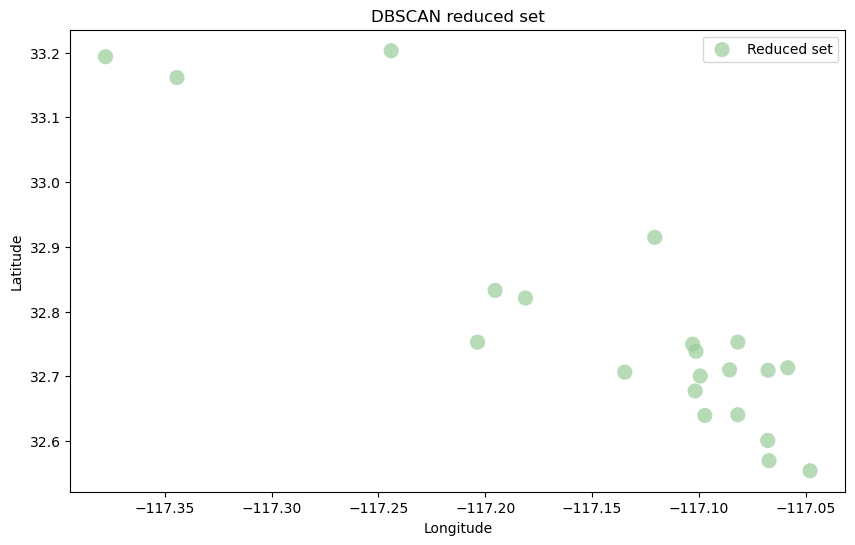

In [324]:
fig, ax = plt.subplots(figsize=[10, 6])
p_scatter = ax.scatter(points['lng'], points['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([p_scatter], ['Reduced set'], loc='upper right')
plt.show()

In [325]:
zips_limited = [91941,91942,92114]

clean_geos_all.reset_index(inplace = True)
df = clean_geos_all[clean_geos_all.zipcode.isin(zips_limited)]
df.set_index('zipcode', inplace=True)
df


,index,name,lat,lng,resource
zipcode,,,,,
91942,2,Sharp Grossmont Hospital,32.781653,-117.008397,hospital
91941,65,Helix High School,32.756465,-117.036208,school
91941,66,La Mesa Arts Academy,32.761663,-117.033283,school
91941,67,Murdock Elementary School,32.754245,-116.985926,school
92114,169,Nye Elementary School,32.707789,-117.073001,school
...,...,...,...,...,...
92114,7875,La Paz Mini Park,32.699694,-117.080643,park
92114,7876,Encanto Park,32.710400,-117.052744,park
92114,8194,George L. Stevens Senior Center,32.698509,-117.058721,park


In [326]:
df = df.drop('index', axis=1)
df

,name,lat,lng,resource
zipcode,,,,
91942,Sharp Grossmont Hospital,32.781653,-117.008397,hospital
91941,Helix High School,32.756465,-117.036208,school
91941,La Mesa Arts Academy,32.761663,-117.033283,school
91941,Murdock Elementary School,32.754245,-116.985926,school
92114,Nye Elementary School,32.707789,-117.073001,school
...,...,...,...,...
92114,La Paz Mini Park,32.699694,-117.080643,park
92114,Encanto Park,32.710400,-117.052744,park
92114,George L. Stevens Senior Center,32.698509,-117.058721,park


In [327]:
coords = df[['lat', 'lng']].values
coords

array([[  32.7816526, -117.0083968],
       [  32.7564647, -117.0362075],
       [  32.7616635, -117.0332828],
       [  32.7542454, -116.9859264],
       [  32.7077893, -117.0730009],
       [  32.6888572, -117.0493652],
       [  32.7030863, -117.0665595],
       [  32.7792966, -117.0056147],
       [  32.7628174, -117.0187199],
       [  32.7748551, -117.0075528],
       [  32.7792966, -117.0056147],
       [  32.7628174, -117.0187199],
       [  32.776085 , -117.0197158],
       [  32.7748551, -117.0075528],
       [  32.7792719, -117.0126681],
       [  32.7156391, -117.026008 ],
       [  32.746536 , -116.9586728],
       [  32.7476105, -116.9605212],
       [  32.7792966, -117.0056147],
       [  32.7748551, -117.0075528],
       [  32.7792719, -117.0126681],
       [  32.710228 , -117.057746 ],
       [  32.7095145, -117.0630531],
       [  32.765915 , -117.019588 ],
       [  32.767805 , -117.015427 ],
       [  32.769344 , -117.011003 ],
       [  32.770425 , -117.008508 ],
 

In [366]:
# Clustering from prime zips limited
kms_per_radian = 6371.0088
epsilon = 0.4 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=5, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters-1)])
print(f'Number of clusters: {num_clusters}')

Number of clusters: 14


In [367]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [368]:
lats, lngs = zip(*centermost_points)
points = pd.DataFrame({'lng':lngs, 'lat':lats})
points

,lng,lat
0,-117.010148,32.780282
1,-117.017699,32.766117
2,-117.063650,32.710358
3,-117.031342,32.705496
4,-117.067062,32.701328
5,-117.042949,32.703165
6,-117.040490,32.755905
7,-117.031763,32.781208
8,-117.045652,32.723852
9,-116.998330,32.750731


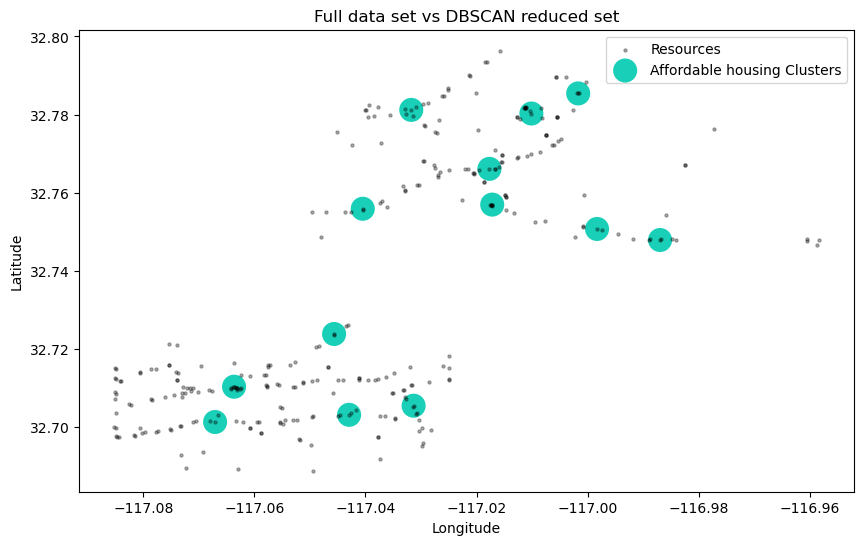

In [371]:
fig, ax = plt.subplots(figsize=[10, 6])
p_scatter = ax.scatter(points['lng'], points['lat'], c='#00CAB1', edgecolor='None', alpha=0.9, s=300)
df_scatter = ax.scatter(df['lng'], df['lat'], c='k', alpha=0.3, s=5)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, p_scatter], ['Resources', 'Affordable housing Clusters'], loc='upper right')
plt.show()

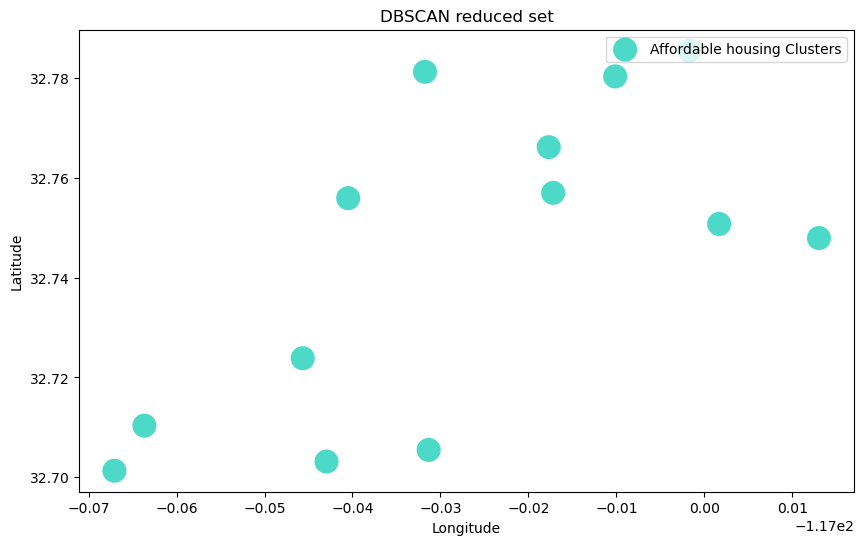

In [372]:
fig, ax = plt.subplots(figsize=[10, 6])
p_scatter = ax.scatter(points['lng'], points['lat'], c='#00CAB1', edgecolor='None', alpha=0.7, s=300)
ax.set_title('DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([p_scatter], ['Affordable housing Clusters'], loc='upper right')
plt.show()